In [1]:
# import librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
df_track=pd.read_excel('spotify.xlsx')

In [3]:
df_track.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [4]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        1610 non-null   int64         
 1   name              1610 non-null   object        
 2   album             1610 non-null   object        
 3   release_date      1610 non-null   datetime64[ns]
 4   track_number      1610 non-null   int64         
 5   id                1610 non-null   object        
 6   uri               1610 non-null   object        
 7   acousticness      1610 non-null   float64       
 8   danceability      1610 non-null   float64       
 9   energy            1610 non-null   float64       
 10  instrumentalness  1610 non-null   float64       
 11  liveness          1610 non-null   float64       
 12  loudness          1610 non-null   float64       
 13  speechiness       1610 non-null   float64       
 14  tempo             1610 n

In [5]:
df_track.describe()

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,804.500000,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,464.911282,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,0.000000,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,402.250000,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,804.500000,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,1206.750000,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,1609.000000,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


In [6]:
# find null values
df_track.isnull().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

#### Visualising Tracks’ Features
 - Here’s a correlation matrix of the tracks’ features:

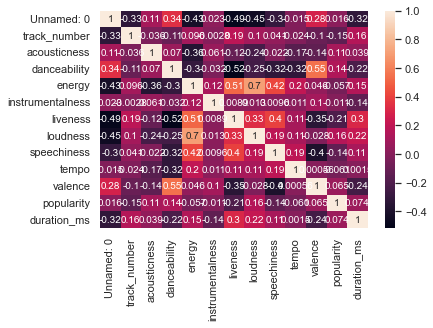

In [7]:
import seaborn as sn
sn.set(rc = {'figure.figsize':(12,10)})
sn.heatmap(df_track.corr(), annot=True)
plt.show()

### Finding the least 10 popular songs in the dataset

In [8]:
df_sort=df_track.sort_values('popularity',ascending = True).head(10)
df_sort

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
1591,1591,Little By Little - Mono Version,England's Newest Hit Makers,1964-05-30,6,1n3XRfhLcsrpnDpvLmzLB0,spotify:track:1n3XRfhLcsrpnDpvLmzLB0,0.014100,0.475,0.731,0.103000,0.161,-8.731,0.0554,87.559,0.903,0,159733
587,587,Next Time You See Me - Live,Live At The Checkerboard Lounge,2012-07-09,8,6Y7sXOOb66zFquJ8EEL9oO,spotify:track:6Y7sXOOb66zFquJ8EEL9oO,0.075400,0.484,0.884,0.012600,0.569,-5.162,0.0987,123.344,0.603,0,660320
1338,1338,All Sold Out,Between The Buttons,1967-01-20,8,73Homv9FozXD85lbCvqkep,spotify:track:73Homv9FozXD85lbCvqkep,0.568000,0.497,0.751,0.000227,0.217,-8.733,0.0444,112.025,0.734,0,197306
1394,1394,Not Fade Away - Live,Got Live if you want it!,1966-12-10,4,3tdCzIQ5K0jT6Z1FGU27uJ,spotify:track:3tdCzIQ5K0jT6Z1FGU27uJ,0.000754,0.515,0.948,0.890000,0.814,-8.779,0.0997,122.533,0.542,0,123666
1396,1396,Fortune Teller - Live,Got Live if you want it!,1966-12-10,6,39UwRqdXwdzOiifx003bVb,spotify:track:39UwRqdXwdzOiifx003bVb,0.003590,0.332,0.989,0.000013,0.221,-7.366,0.1490,173.877,0.301,0,116933
1397,1397,The Last Time - Live,Got Live if you want it!,1966-12-10,7,3ojj6rJhR7PgYOn7bbBYEL,spotify:track:3ojj6rJhR7PgYOn7bbBYEL,0.050800,0.339,0.936,0.000000,0.558,-7.042,0.0638,103.362,0.466,0,187800
739,739,Continental Drift - Live,Flashpoint,1991-04-02,1,6fmxr9Wui3uYW7GtpscwDx,spotify:track:6fmxr9Wui3uYW7GtpscwDx,0.019500,0.296,0.735,0.725000,0.692,-22.301,0.0469,107.788,0.200,0,27693
1589,1589,Honest I Do,England's Newest Hit Makers,1964-05-30,4,6DhWfyUAX17MrrQAlgbsHw,spotify:track:6DhWfyUAX17MrrQAlgbsHw,0.136000,0.628,0.368,0.538000,0.170,-10.734,0.1080,87.178,0.470,0,129826
1400,1400,I'm Alright - Live,Got Live if you want it!,1966-12-10,10,6G6HUDo8rsJOHgBsAqPUee,spotify:track:6G6HUDo8rsJOHgBsAqPUee,0.013600,0.414,0.942,0.132000,0.940,-7.757,0.0629,119.475,0.530,0,146493
1401,1401,"Have You Seen Your Mother, Baby, Standing In T...",Got Live if you want it!,1966-12-10,11,11ALfJyppuVJdqYssXbcM1,spotify:track:11ALfJyppuVJdqYssXbcM1,0.025600,0.427,0.915,0.017900,0.890,-7.401,0.0446,109.260,0.476,0,139240


### Finding the  10 popular songs in the dataset

In [9]:
df_track['popularity'].unique()

array([33, 34, 32, 31, 30, 29, 27, 28, 26, 25, 24, 39, 23, 22, 19, 20, 18,
       17, 15, 16, 12, 11, 13,  9,  8, 10, 21, 35, 42, 37, 14, 41, 49, 46,
       44, 38,  0,  7,  4,  6,  5,  3,  2, 43,  1, 45, 36, 48, 61, 53, 76,
       55, 59, 40, 54, 69, 72, 51, 71, 52, 63, 56, 50, 66, 58, 67, 73, 80,
       64], dtype=int64)

In [10]:
most_popular=df_track.query('popularity>50',inplace=False).sort_values('popularity',ascending=False)

In [11]:
most_popular[:10]

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
1403,1403,"Paint It, Black",Aftermath,1966-04-15,1,63T7DJ1AFDD6Bn8VzG6JE8,spotify:track:63T7DJ1AFDD6Bn8VzG6JE8,0.0493,0.464,0.795,0.002440,0.3990,-9.267,0.0926,158.691,0.612,80,202266
862,862,Start Me Up - Remastered 2009,Tattoo You (2009 Re-Mastered),1981-08-24,1,7HKez549fwJQDzx3zLjHKC,spotify:track:7HKez549fwJQDzx3zLjHKC,0.0436,0.631,0.932,0.137000,0.0918,-4.142,0.0354,122.429,0.971,76,213066
1472,1472,(I Can't Get No) Satisfaction - Mono Version,Out Of Our Heads,1965-07-30,7,2PzU4IB8Dr6mxV3lHuaG34,spotify:track:2PzU4IB8Dr6mxV3lHuaG34,0.0383,0.723,0.863,0.031700,0.1280,-7.890,0.0338,136.302,0.931,76,222813
1248,1248,Gimme Shelter,Let It Bleed,1969-12-05,1,6H3kDe7CGoWYBabAeVWGiD,spotify:track:6H3kDe7CGoWYBabAeVWGiD,0.4470,0.634,0.630,0.039000,0.1700,-8.277,0.0310,118.628,0.489,76,270773
1257,1257,Sympathy For The Devil - 50th Anniversary Edition,Beggars Banquet (50th Anniversary Edition),1968-12-06,1,1Ud6moTC0KyXMq1Oxfien0,spotify:track:1Ud6moTC0KyXMq1Oxfien0,0.5180,0.702,0.668,0.000000,0.0588,-9.237,0.2140,116.063,0.561,73,378146
901,901,Beast Of Burden - Remastered 1994,Some Girls,1978-06-09,9,77oU2rjC5XbjQfNe3bD6so,spotify:track:77oU2rjC5XbjQfNe3bD6so,0.3900,0.783,0.878,0.000778,0.0426,-3.864,0.0308,100.626,0.885,72,265173
1023,1023,Angie,Goats Head Soup (Remastered 2009),1973-08-31,5,1GcVa4jFySlun4jLSuMhiq,spotify:track:1GcVa4jFySlun4jLSuMhiq,0.6700,0.429,0.554,0.000152,0.1050,-6.128,0.0291,136.302,0.407,71,272000
1122,1122,Wild Horses - 2009 Mix,Sticky Fingers (Remastered),1971-04-23,3,52dm9op3rbfAkc1LGXgipW,spotify:track:52dm9op3rbfAkc1LGXgipW,0.6870,0.432,0.389,0.010700,0.0788,-6.517,0.0255,139.506,0.158,69,341773
893,893,Miss You - Remastered,Some Girls,1978-06-09,1,3hJLKtTpgct9Y9wKww0BiR,spotify:track:3hJLKtTpgct9Y9wKww0BiR,0.4430,0.795,0.710,0.021500,0.3440,-4.746,0.0392,109.689,0.845,69,288666
1256,1256,You Can't Always Get What You Want,Let It Bleed,1969-12-05,9,6lFZbCc7pn6Lme1NP7qQqQ,spotify:track:6lFZbCc7pn6Lme1NP7qQqQ,0.6400,0.320,0.620,0.000064,0.2530,-9.686,0.0594,86.327,0.472,67,448720


### Making the release date column as index column

In [12]:
df_track.set_index('release_date',inplace=True)
df_track.index=pd.to_datetime(df_track.index)
df_track.head()

,Unnamed: 0,name,album,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
release_date,,,,,,,,,,,,,,,,,
2022-06-10,0,Concert Intro Music - Live,Licked Live In NYC,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
2022-06-10,1,Street Fighting Man - Live,Licked Live In NYC,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2022-06-10,2,Start Me Up - Live,Licked Live In NYC,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
2022-06-10,3,If You Can't Rock Me - Live,Licked Live In NYC,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
2022-06-10,4,Donâ€™t Stop - Live,Licked Live In NYC,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


### lets Create a  Regression plot between energy and Loudness

Text(0.5, 1.0, 'Loudness vs Energy')

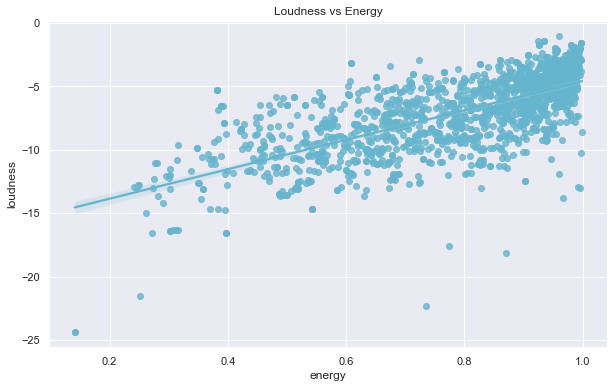

In [13]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_track, y='loudness',x='energy',color='c')
plt.title('Loudness vs Energy')

##### The result is plotted. There is a very high positive correlation between loudness and energy. You can also see that all the data points or the songs are in one direction. If the energy increases, the loudness of the song increases and similarly, if the song's loudness decreases, the energy of the track also decreases

### Create a Regression Plot Between Popularity and Acousticness in the Form of a Regression Line

Text(0.5, 1.0, 'Popularity vs Acousticness')

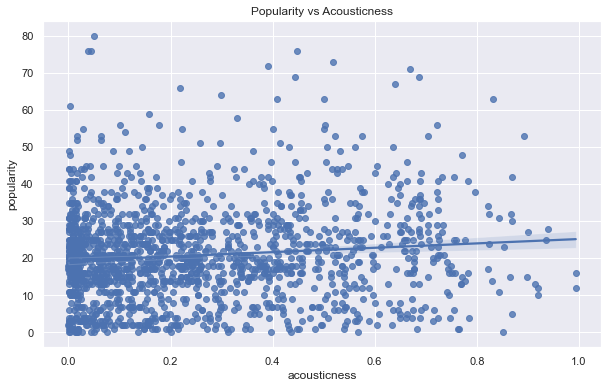

In [14]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_track, y='popularity',x='acousticness',color='b')
plt.title('Popularity vs Acousticness')

###### Here, we can see the blue color regression line is in downward direction, which denotes if the acousticness of the song increases, the popularity decreases and similarly, if the popularity increases, the acousticness decreases.

### lets Create a Regression plot between danceability and Loudness

Text(0.5, 1.0, 'Loudness vs danceability')

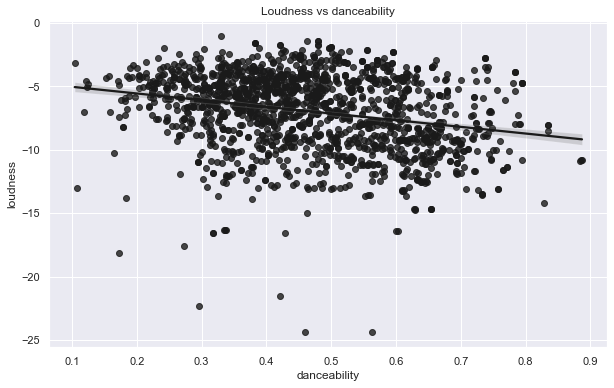

In [15]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_track, y='loudness',x='danceability',color='k')
plt.title('Loudness vs danceability')

##### The result is plotted. There is a  correlation between loudness and danceability. You can also see that all the data points mostly of them are in centre. If the loudness increases, the danceability increases and similarly, if the song's loudness decreases, the danceability decrease but not much

### Plot Duration of the Songs w.r.t. different albums using a horizontal barplot.

<AxesSubplot: xlabel='duration_ms', ylabel='album'>

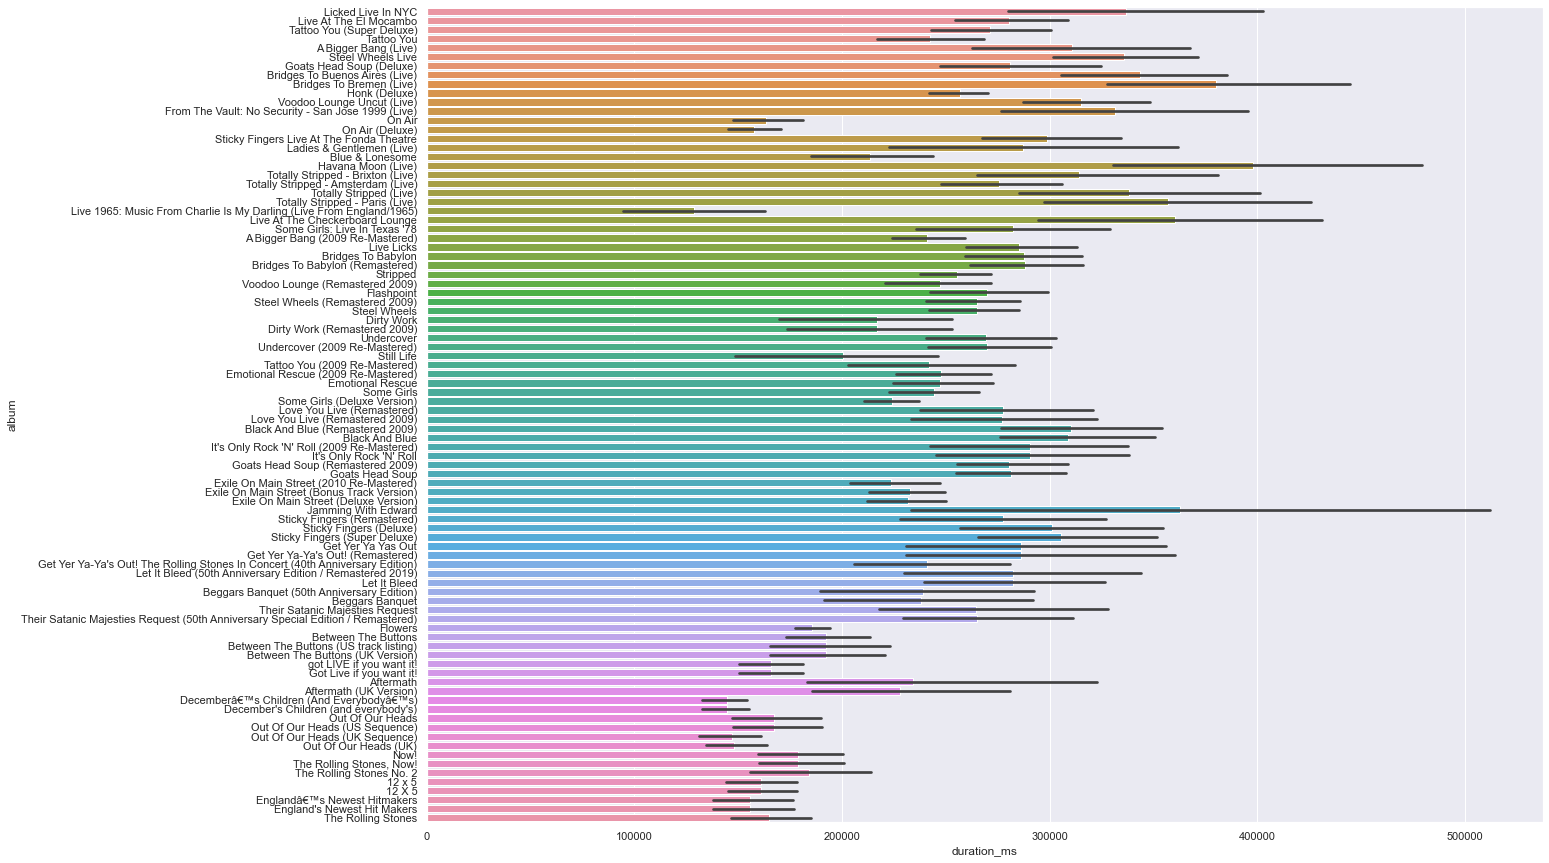

In [16]:
plt.figure(figsize=(20,15))
sns.color_palette('rocket',as_cmap=True)
sns.barplot(y='album',x='duration_ms',data=df_track)

#### Here, we got the albums on Y-axis and Duration in milliseconds on the X-axis. We can analyze the data and find out that classical and world genres have longer duration of songs 

### Find top album by Popularity and plot a barplot for the same.

<AxesSubplot: xlabel='popularity', ylabel='album'>

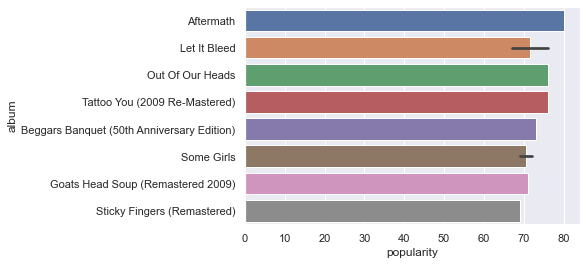

In [17]:
sns.set_style(style='darkgrid')
famous=df_track.sort_values('popularity',ascending=False).head(10)
sns.barplot(y='album',x='popularity',data=famous)

#### Here we got our top 8 albums based on the popularity